In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os

# Evaluation of Parameter Estimation for Successive Halving Gridsearch
This file was made to get an overlook of the cv_results_ variable of the Successive Halving Gridsearch

## Loading

In [12]:
# Defining variables
tr_results_folder = "../../.././data/training/training_results"
clf_type = "RF"
model_folder = "2023_09_19-2233"
model_folder = None
cv_file_name = "cv_results.pkl"
settings_name = "estimation_settings.json"

# Getting general path
path = os.path.join(tr_results_folder, clf_type)
if model_folder is None:
    path = [x[0] for x in os.walk(path)][-1:][0]
else:
    path = os.path.join(path, model_folder)

# Loading cv_results    
cv_res_path = os.path.join(path, cv_file_name)
cv_results_df = pd.read_pickle(cv_res_path)

cv_results_df

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_max_features,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0,25,1.447484,0.057585,0.076532,0.006472,True,gini,1,sqrt,...,0.468324,0.003293,568,0.467689,0.469202,0.470369,0.467584,0.467315,0.468432,0.001172
1,0,25,1.287956,0.076120,0.075497,0.005633,True,gini,1,sqrt,...,0.468324,0.003293,568,0.467689,0.469202,0.470369,0.467584,0.467315,0.468432,0.001172
2,0,25,1.291814,0.074977,0.075697,0.005057,True,gini,1,sqrt,...,0.468324,0.003293,568,0.467689,0.469202,0.470369,0.467584,0.467315,0.468432,0.001172
3,0,25,1.295692,0.072215,0.074990,0.004926,True,gini,1,sqrt,...,0.468324,0.003293,568,0.467689,0.469202,0.470369,0.467584,0.467315,0.468432,0.001172
4,0,25,1.644860,0.094493,0.075765,0.005685,True,gini,1,0.3,...,0.431995,0.001549,576,0.435293,0.432309,0.431061,0.430655,0.431575,0.432179,0.001652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,6,1600,1997.433263,35.766823,30.712855,1.253608,True,entropy,None,0.6,...,0.720381,0.001979,19,0.999843,0.999803,0.999829,0.999829,0.999856,0.999832,0.000018
631,6,1600,769.417096,21.689007,35.921282,1.490538,True,entropy,None,sqrt,...,0.721200,0.002239,13,0.999843,0.999803,0.999829,0.999829,0.999856,0.999832,0.000018
632,6,1600,671.411797,25.451062,36.624282,1.290209,True,gini,None,sqrt,...,0.721965,0.001755,10,0.999843,0.999803,0.999829,0.999829,0.999856,0.999832,0.000018
633,6,1600,1101.675926,45.349103,32.706426,1.047983,True,entropy,None,0.3,...,0.722554,0.001981,4,0.999843,0.999803,0.999829,0.999829,0.999856,0.999832,0.000018


In [13]:
settings_path = os.path.join(path, settings_name)
with open(settings_path) as f:
    parameters = json.load(f)

data_info = parameters.get("data_info")
param_info = parameters.get("est_info")
result_info = parameters.get("result_info")
parameters

{'result_info': {'time_start': '2024_01_25 04:40',
  'time_end': '2024_01_25 18:14',
  'time_needed': '13:34:16.879356',
  'clf_name': 'RandomForestClassifier',
  'clf_module': 'sklearn.ensemble._forest',
  'best_params': {'bootstrap': True,
   'criterion': 'gini',
   'max_depth': None,
   'max_features': 0.3,
   'min_samples_split': 2,
   'n_estimators': 1600},
  'score_metric': 'accuracy',
  'score_value': 0.7234370249787274,
  'n_resources': [25, 50, 100, 200, 400, 800, 1600],
  'n_candidates': [320, 160, 80, 40, 20, 10, 5]},
 'data_info': {'data_folder': '../.././data/preprocessing/processed_files/B',
  'X_train shape': [278508, 27],
  'y_train shape': [278508],
  'X_test shape': [69628, 27],
  'y_test shape': [69628]},
 'est_info': {'base_clf': "RandomForestClassifier(class_weight='balanced', random_state=42)",
  'param_grid': {'max_depth': [1, 2, 3, None],
   'max_features': ['sqrt', 0.3, 0.6, 0.9, 1.0],
   'min_samples_split': [2, 0.1, 0.2, 0.3],
   'bootstrap': [True, False],
 

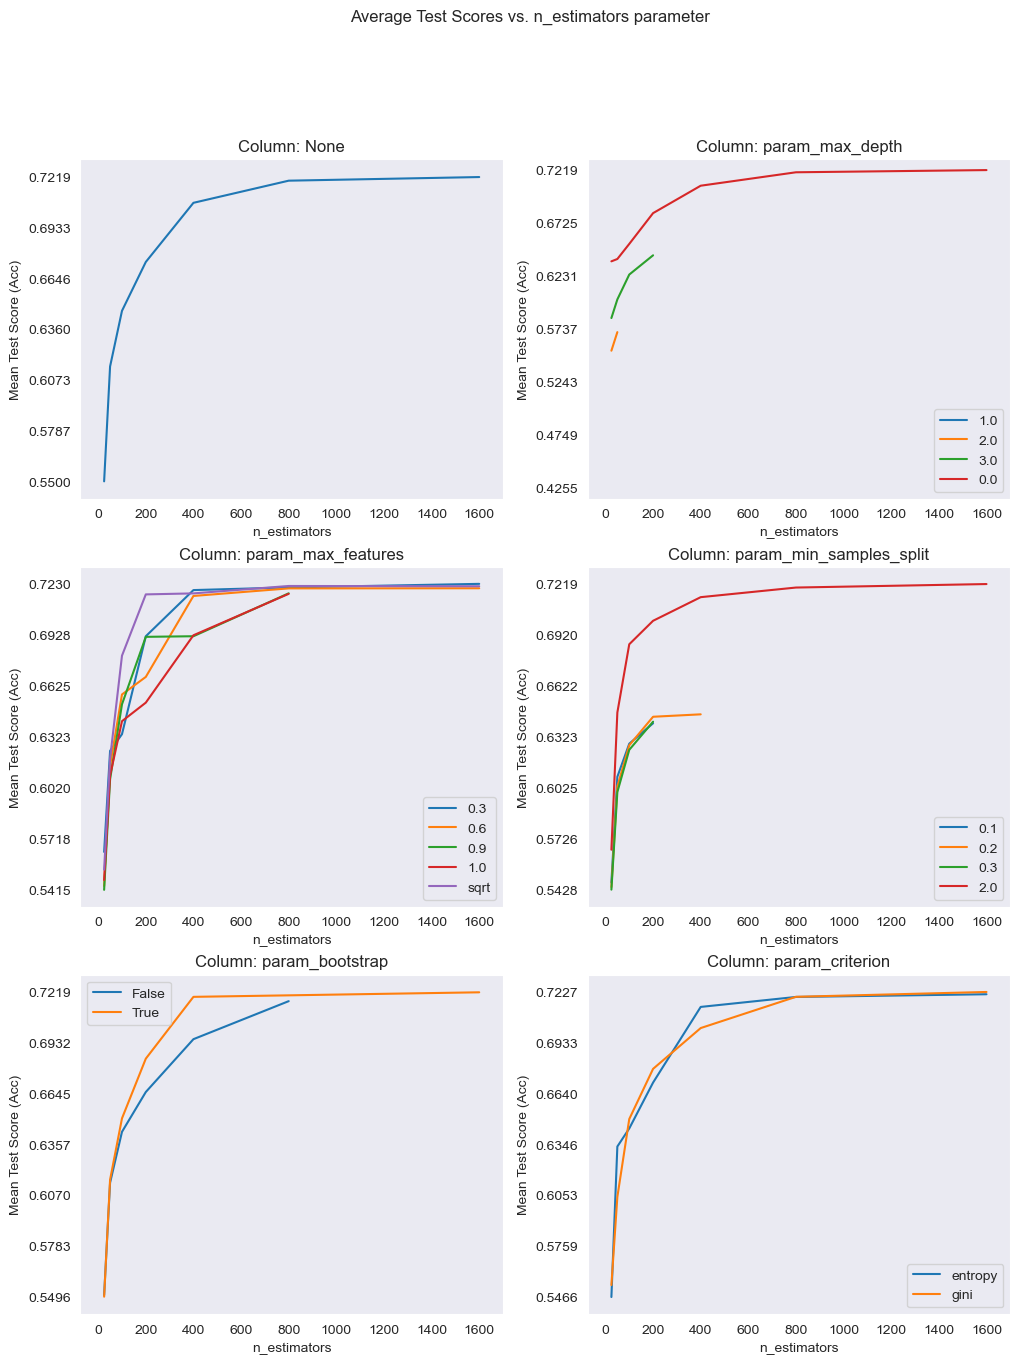

In [14]:
def make_plot(df, X_label, Y_label,ax, C_label = None):
    if C_label:
        C = df[C_label]
        for item in list(C.unique()):
            X = df[df[C_label] == item][X_label]
            Y = df[df[C_label] == item][Y_label]
            ax.plot(X, Y, label = str(item))
        ax.legend()
    else:
        X = df[X_label]
        Y = df[Y_label]
        ax.plot(X, Y)
    ax.set_xlabel("n_estimators")
    ax.set_ylabel("Mean Test Score (Acc)")
    ax.set_title(f"Column: {C_label}")
    ax.set_xlim([df[X_label].min() - 100,df[X_label].max() + 100])
    ax.set_ylim([df[Y_label].min() - 0.01, df[Y_label].max() + 0.01])
    ax.set_yticks(np.linspace(df[Y_label].min(), df[Y_label].max(), 7))
    ax.grid()

grid_param_cols = ["param_" + s for s in list(param_info.get("param_grid").keys())]
n_cols = 2
n_rows =(len(grid_param_cols) + 1) / n_cols
fig, axs = plt.subplots(nrows=int(n_rows), ncols=int(n_cols), figsize=(12,15))
fig.suptitle("Average Test Scores vs. n_estimators parameter")
data = cv_results_df[["n_resources", "mean_test_score"]].groupby(by=["n_resources"]).mean()
data = data.reset_index()
make_plot(df = data, X_label="n_resources", Y_label="mean_test_score", ax=axs[0][0])
for c, col in enumerate(grid_param_cols):
    c = c + 1
    param_data = cv_results_df[['n_resources',col, 'mean_test_score']].groupby(by=["n_resources", col], dropna=False).mean()
    param_data = param_data.reset_index()
    if col == "param_max_depth":
        param_data = param_data.fillna(0)
    make_plot(df = param_data, X_label = "n_resources", Y_label = "mean_test_score", ax=axs[int(c/2)][c%2], C_label=col)

plt.show()